In [1]:
import numpy as np
import pandas as pd
import os
import statsmodels.formula.api as stats
from statsmodels.formula.api import ols
import sklearn
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
happiness_2015 = pd.read_csv("../Datasets/2015.csv")
columns_2015 = ['Region', 'Standard Error']
new_happiness_2015 = happiness_2015.drop(columns_2015, axis=1)
new_happiness_2015.columns = ['Country', 'Happiness_Rank', 'Happiness_Score', 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generousity', 'Dystopia_Residual']

In [3]:
happiness_2016 = pd.read_csv("../Datasets/2016.csv")
columns_2016 = ['Region', 'Lower Confidence Interval', 'Upper Confidence Interval' ]
new_happiness_2016 = happiness_2016.drop(columns_2016, axis=1)
new_happiness_2016.columns = ['Country', 'Happiness_Rank', 'Happiness_Score', 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generousity', 'Dystopia_Residual']

In [4]:
happiness_2017 = pd.read_csv("../Datasets/2017.csv")
columns_2017 = ['Whisker.high', 'Whisker.low' ]
new_happiness_2017 = happiness_2017.drop(columns_2017, axis=1)
new_happiness_2017.columns = ['Country', 'Happiness_Rank', 'Happiness_Score', 'Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generousity', 'Dystopia_Residual']

In [5]:
frames = [new_happiness_2015, new_happiness_2016, new_happiness_2017]
happiness = pd.concat(frames)
happiness.to_csv('happiness.csv', encoding='utf-8')
happiness.head

<bound method NDFrame.head of                       Country  Happiness_Rank  Happiness_Score   Economy  \
0                 Switzerland               1            7.587  1.396510   
1                     Iceland               2            7.561  1.302320   
2                     Denmark               3            7.527  1.325480   
3                      Norway               4            7.522  1.459000   
4                      Canada               5            7.427  1.326290   
..                        ...             ...              ...       ...   
150                    Rwanda             151            3.471  0.368746   
151                     Syria             152            3.462  0.777153   
152                  Tanzania             153            3.349  0.511136   
153                   Burundi             154            2.905  0.091623   
154  Central African Republic             155            2.693  0.000000   

       Family    Health   Freedom     Trust  Generousity 

In [6]:
happiness.head()

,Country,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generousity,Dystopia_Residual
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
happiness.describe()

,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generousity,Dystopia_Residual
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,78.829787,5.370728,0.927830,0.990347,0.579968,0.402828,0.175605,0.201426,2.092717
std,45.281408,1.136998,0.415584,0.318707,0.240161,0.150356,0.131909,0.133211,0.565772
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.000000,4.509000,0.605292,0.793000,0.402301,0.297615,0.075792,0.098303,1.737975
50%,79.000000,5.282500,0.995439,1.025665,0.630053,0.418347,0.139081,0.181624,2.094640
75%,118.000000,6.233750,1.252443,1.228745,0.768298,0.516850,0.249839,0.275505,2.455575
max,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.838075,0.819710,3.837720


In [8]:
# data = dict(type = 'chloropleth',
#            locationmode = 'country names',
#            z = happiness['Happiness_Rank'],
#            text = happiness['Country'],
#            colorscale = 'Viridis')
# layout = dict(title = 'Happiness Rank Across the World')
# fig = go.Figure(data = [data], layout=layout)
# iplot(fig)

In [9]:
drop_rank = happiness.drop("Happiness_Rank", axis = 1)

In [10]:
# corr_matrix_happy = drop_rank.corr()
# trace_corr_happy = go.HeatMap(z=np.array(corr_matrix_happy), x=corr_matrix_happy.columns, y=corr_matrix_happy.columns)
# data_happy=[trace_corr_happy]
# iplot(data_happy)

In [11]:
dropped_happy = happiness.drop(["Country", "Happiness_Rank"], axis=1)
dropped_happy.head()

,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generousity,Dystopia_Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [12]:
X = dropped_happy.drop(['Happiness_Score'], axis=1)
y = dropped_happy['Happiness_Score']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_pred = lm.predict(X_test)

In [15]:
result_lm = pd.DataFrame({
    'Actual':y_test,
    'Predict':y_pred
})
result_lm['Diff'] = y_test - y_pred
result_lm.head()

,Actual,Predict,Diff
136,4.033,4.032971,0.000029
100,4.829,4.828671,0.000329
13,7.087,7.086635,0.000365
138,3.808,3.808284,-0.000284
114,4.610,4.609679,0.000321


In [16]:
print("Estimated Intercept is ", lm.intercept_)

Estimated Intercept is  9.146676304805368e-05


In [17]:
print("The number of coefficients in this model are ", lm.coef_)

The number of coefficients in this model are  [1.00007148 1.00000173 0.99983087 0.99993754 1.00001913 1.00003413
 0.99997579]


In [18]:
# y = b0 + b1x1 + b2x2 + b3x3 + ... + c0
coef = zip(X.columns, lm.coef_)
coef_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features', 'coefficients'])
coef_df

,features,coefficients
0,Economy,1.000071
1,Family,1.000002
2,Health,0.999831
3,Freedom,0.999938
4,Trust,1.000019
5,Generousity,1.000034
6,Dystopia_Residual,0.999976


In [19]:
from sklearn.metrics import mean_absolute_error
%matplotlib inline
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))
#Variance Score: 1 is perfect prediction
print('Variance score: %.2f' %lm.score(X_test, y_test))

Mean Absolute Error:  0.00024788206313239243
Mean Squared Error:  8.292041555266052e-08
Root Mean Squared Error:  0.00028795905186790105
Variance score: 1.00


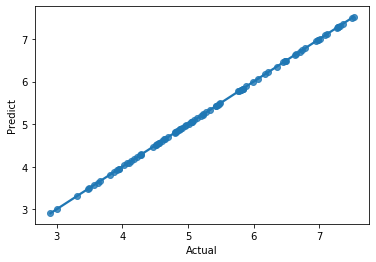

In [20]:
import seaborn as sns
%matplotlib inline
sns.regplot(x='Actual',y='Predict',data=result_lm)

In [21]:
# HappinessScore = intercept + b1x1 + b2x2 + b3x3


In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

ValueError: continuous is not supported